In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import platform
mysystem = platform.system()
# We need to first download the data here:
file_id = '10PSeKeL3aUA56faRhr4ZfkEPcVtKjlry'
file_download_link = "https://docs.google.com/uc?export=download&id=" + file_id
# Check for windows
if mysystem != 'Windows':
    !wget -O dataset.csv --no-check-certificate "$file_download_link"
    # !unzip data.zip

print('Please download the data using the following link:', file_download_link)

--2022-11-27 02:52:09--  https://docs.google.com/uc?export=download&id=10PSeKeL3aUA56faRhr4ZfkEPcVtKjlry
Resolving docs.google.com (docs.google.com)... 108.177.11.139, 108.177.11.138, 108.177.11.100, ...
Connecting to docs.google.com (docs.google.com)|108.177.11.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-50-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ok4ka5eqgsv51lntgks3o37qi85grbro/1669517475000/16176821467984544774/*/10PSeKeL3aUA56faRhr4ZfkEPcVtKjlry?e=download&uuid=1896c8a5-debf-4f93-8c60-1757297a6d84 [following]
--2022-11-27 02:52:11--  https://doc-04-50-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ok4ka5eqgsv51lntgks3o37qi85grbro/1669517475000/16176821467984544774/*/10PSeKeL3aUA56faRhr4ZfkEPcVtKjlry?e=download&uuid=1896c8a5-debf-4f93-8c60-1757297a6d84
Resolving doc-04-50-docs.googleusercontent.com (doc-04-50-docs.googleusercontent.com)... 142.251.107.132, 2607:f8b0

In [ ]:
import sys
!{sys.executable} -m pip install imbalanced-learn delayed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('dataset.csv')
# df = df.sample(n= 80000, random_state=21)
df_rem = df.drop(columns=['Unnamed: 0', 'track_id','track_name','explicit'])

In [ ]:
df['track_genre'].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

In [ ]:

df_rem = df_rem.loc[df_rem['track_genre'] == 'party']
df['popularity'].unique()


array([ 73,  55,  57,  71,  82,  58,  74,  80,  56,  69,  52,  62,  54,
        68,  67,  75,  63,  70,   0,   1,  46,  61,  60,  51,  66,  64,
        65,  44,  45,  50,  59,  49,  53,  47,  43,  42,  20,  22,  35,
        19,  24,  18,  23,  40,  38,  41,  30,  37,  39,  48,  36,  34,
        26,  32,  33,  21,  31,  28,  29,  27,  25,  16,   3,  12,   7,
        10,   9,  11,  17,   8,  15,  87,  83,  86,  93,  76,  78,   4,
         2,   5,  85,  81,  84,  72,  79,  77,   6,  13,  14,  89,  96,
       100,  98,  88,  92,  90,  91,  99,  97,  95,  94])

In [ ]:
df_rem

,artists,album_name,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
78000,Harris & Ford;2 Engel & Charlie,Layla sitzt dicht im Flieger,2,126133,0.702,0.839,6,-3.954,0,0.0744,0.02320,0.000261,0.0932,0.348,112.516,1,party
78001,Die Zipfelbuben;DJ Cashi,Ballermann Party Hits Megamix 2022.2,0,180157,0.666,0.942,1,-2.928,1,0.0689,0.03070,0.000000,0.2460,0.832,141.913,4,party
78002,DJ Robin;Schürze,Best Of Karneval,0,185437,0.442,0.922,5,-2.918,0,0.0695,0.00134,0.000000,0.4320,0.388,140.082,4,party
78003,Julian Sommer,Best Of Karneval,1,225882,0.607,0.958,8,-1.131,1,0.0866,0.04120,0.000000,0.2590,0.404,136.036,4,party
78004,DJ Ötzi;Marc Pircher,Karneval 2022 100%,0,239053,0.635,0.996,7,-3.107,1,0.0690,0.08790,0.000000,0.1580,0.670,130.033,4,party
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78995,Andreas Gabalier,Home Sweet Home,23,294146,0.448,0.768,8,-5.951,1,0.1010,0.10300,0.000000,0.1190,0.489,151.014,4,party
78996,Marco Wagner;Dave Brown,House by the Sea,23,204693,0.766,0.947,7,-3.878,1,0.0331,0.03480,0.000004,0.3200,0.765,127.951,4,party
78997,Jürgen Drews;Howard Carpendale,Das ultimative Jubiläums-Best-Of,24,200893,0.634,0.549,4,-7.192,1,0.0244,0.34900,0.000000,0.1080,0.444,98.004,4,party
78998,Die Draufgänger,Grün,23,175053,0.699,0.905,11,-3.717,0,0.0354,0.01240,0.000142,0.1060,0.971,144.984,4,party


In [ ]:
#check for null values
substring = 'None'
df_rem[df_rem.apply(lambda row: row.astype(str).str.contains(substring, case=False).any(), axis=1)]

,artists,album_name,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre


In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

#label encoding albums
df_rem['album_name'].unique()
df_rem['album_name'] = label_encoder.fit_transform(df_rem['album_name'])


In [ ]:
# label encoding the generes
# df_rem['track_genre'].unique()
# df_rem['track_genre'] = label_encoder.fit_transform(df_rem['track_genre'])
# #spiltting the a row with multiple artite=s into multiple rows

# df_rem = (df_rem.set_index(['album_name', 'popularity', 'duration_ms', 'danceability', 'energy',
#        'key', 'loudness', 'mode', 'speechiness', 'acousticness',
#        'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
#        'track_genre'])
#    .apply(lambda x: x.str.split(';').explode())
#    .reset_index())

In [ ]:
# label encoding the generes
# df_rem['artists'].unique().size
# 6533
# df_rem['artists'] = label_encoder.fit_transform(df_rem['artists'])
# df_rem.shape
# (11023, 17)
# df_rem

In [ ]:
df_rem = df_rem.drop(columns=['track_genre','artists'])
df_rem

,album_name,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
78000,305,2,126133,0.702,0.839,6,-3.954,0,0.0744,0.02320,0.000261,0.0932,0.348,112.516,1
78001,55,0,180157,0.666,0.942,1,-2.928,1,0.0689,0.03070,0.000000,0.2460,0.832,141.913,4
78002,70,0,185437,0.442,0.922,5,-2.918,0,0.0695,0.00134,0.000000,0.4320,0.388,140.082,4
78003,70,1,225882,0.607,0.958,8,-1.131,1,0.0866,0.04120,0.000000,0.2590,0.404,136.036,4
78004,278,0,239053,0.635,0.996,7,-3.107,1,0.0690,0.08790,0.000000,0.1580,0.670,130.033,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78995,233,23,294146,0.448,0.768,8,-5.951,1,0.1010,0.10300,0.000000,0.1190,0.489,151.014,4
78996,235,23,204693,0.766,0.947,7,-3.878,1,0.0331,0.03480,0.000004,0.3200,0.765,127.951,4
78997,113,24,200893,0.634,0.549,4,-7.192,1,0.0244,0.34900,0.000000,0.1080,0.444,98.004,4
78998,205,23,175053,0.699,0.905,11,-3.717,0,0.0354,0.01240,0.000142,0.1060,0.971,144.984,4


In [ ]:
(df_rem['popularity']/25).astype(int).unique()


array([0, 1, 2])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
modified_df = df_rem.drop(columns = ['album_name', 'popularity'])
df_norm = pd.DataFrame(scaler.fit_transform(modified_df), columns = modified_df.columns)
df_norm['album_name'] = df_rem['album_name'].to_numpy()
df_norm['popularity'] = df_rem['popularity'].to_numpy()/25
df_norm.popularity=df_norm.popularity.astype(int)
df_norm_rounded = df_norm.round(2)
df_norm
print(df_norm['popularity'].unique() ) 


[0 1 2]


In [ ]:
df_norm.describe()


,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,album_name,popularity
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.056112,0.530685,0.855160,0.485545,0.699345,0.759000,0.147678,0.117957,0.003445,0.284826,0.665854,0.494546,0.741000,236.828000,0.591000
std,0.032742,0.155077,0.135611,0.328177,0.138301,0.427904,0.155255,0.149663,0.037188,0.216143,0.217026,0.113755,0.065561,153.301114,0.529149
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.048212,0.431231,0.798650,0.181818,0.626353,1.000000,0.040005,0.021567,0.000000,0.110202,0.515609,0.457924,0.750000,89.750000,0.000000
50%,0.054671,0.534954,0.894826,0.545455,0.713273,1.000000,0.087388,0.064094,0.000000,0.260547,0.693923,0.499280,0.750000,234.500000,1.000000
75%,0.062075,0.635258,0.955006,0.727273,0.801711,1.000000,0.195873,0.158054,0.000004,0.359755,0.833352,0.554971,0.750000,361.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,542.000000,2.000000


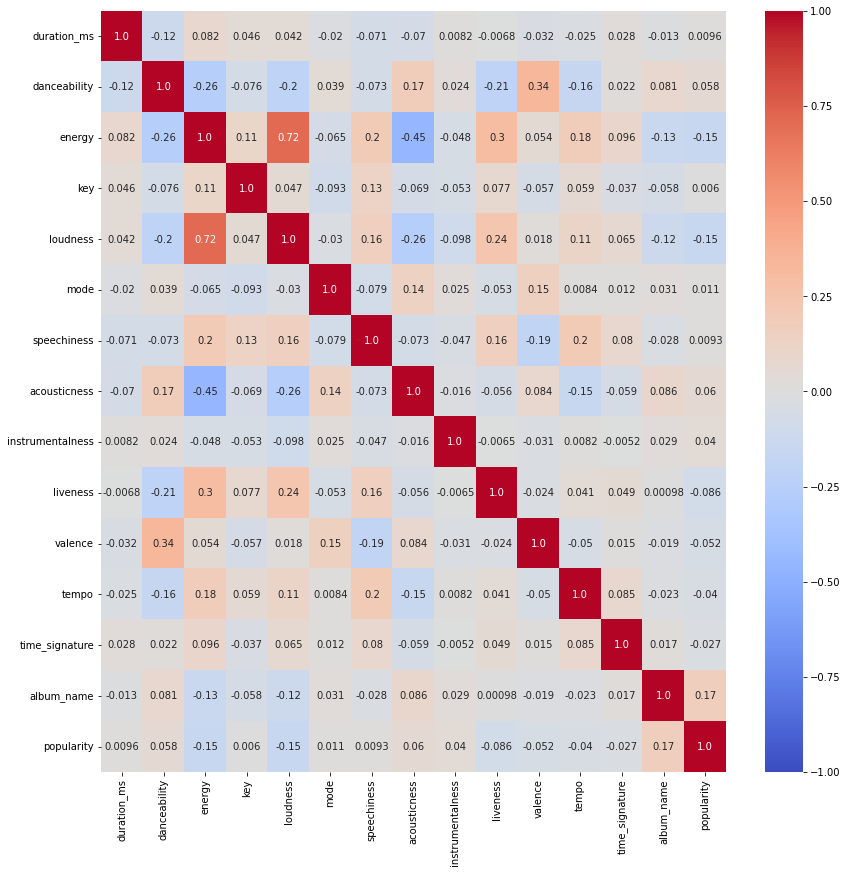

In [ ]:
corr = df_norm.corr()
fig, ax = plt.subplots(figsize=(14, 14))
_ = sns.heatmap(corr, vmin=-1, vmax=1, center=0, annot=True, fmt='.2',cmap= 'coolwarm')


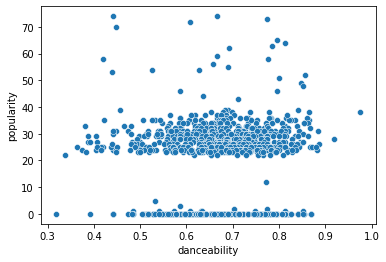

In [ ]:
sns.scatterplot(data=df_rem, x='danceability', y='popularity')

In [ ]:
#  _=sns.pairplot(data=df_norm)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_norm.drop(['popularity'], axis=1), df_norm.popularity, test_size=0.2, random_state=1)
print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)


(200, 14)
(800, 14)
(200,)
(800,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logreg = LogisticRegression()
logreg.fit(X_train,y_train)
yhat_test = logreg.predict(X_test)
logreg.score(X_test, y_test)
print(classification_report(y_test, yhat_test))

              precision    recall  f1-score   support

           0       0.59      0.38      0.46        89
           1       0.58      0.78      0.67       106
           2       0.00      0.00      0.00         5

    accuracy                           0.58       200
   macro avg       0.39      0.39      0.38       200
weighted avg       0.57      0.58      0.56       200



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0

In [ ]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report


In [30]:
# Let's initialize our model
 # Initialising the ANNmodel = Sequential() # Initialising the ANN
model = Sequential()
model.add(Dense(units = 14, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dense(units = 7, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dense(units = 9, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dense(units = 7, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dense(units = 1, activation = 'sigmoid', input_dim = X_train.shape[1]))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 14)                210       
                                                                 
 dense_6 (Dense)             (None, 7)                 105       
                                                                 
 dense_7 (Dense)             (None, 9)                 72        
                                                                 
 dense_8 (Dense)             (None, 7)                 70        
                                                                 
 dense_9 (Dense)             (None, 1)                 8         
                                                                 
Total params: 465
Trainable params: 465
Non-trainable params: 0
_________________________________________________________________


In [55]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics=['accuracy'])
his = model.fit(X_train.astype('float'), y_train, validation_split = 0.1,batch_size = 5, epochs = 100)

Epoch 1/100
144/144 [==============================] - 1s 4ms/step - loss: 0.6363 - accuracy: 0.5958 - val_loss: 0.6251 - val_accuracy: 0.5875
Epoch 2/100
144/144 [==============================] - 0s 3ms/step - loss: 0.6441 - accuracy: 0.6056 - val_loss: 0.6247 - val_accuracy: 0.5875
Epoch 3/100
144/144 [==============================] - 0s 2ms/step - loss: 0.6415 - accuracy: 0.6000 - val_loss: 0.6277 - val_accuracy: 0.5875
Epoch 4/100
144/144 [==============================] - 0s 3ms/step - loss: 0.6297 - accuracy: 0.6111 - val_loss: 0.6258 - val_accuracy: 0.5875
Epoch 5/100
144/144 [==============================] - 0s 2ms/step - loss: 0.6235 - accuracy: 0.6111 - val_loss: 0.6415 - val_accuracy: 0.5125
Epoch 6/100
144/144 [==============================] - 0s 3ms/step - loss: 0.6343 - accuracy: 0.5944 - val_loss: 0.6252 - val_accuracy: 0.5875
Epoch 7/100
144/144 [==============================] - 0s 2ms/step - loss: 0.6310 - accuracy: 0.6028 - val_loss: 0.6228 - val_accuracy: 0.5875

In [34]:
yhat_test = model.predict(X_test.astype(float))
yhat_test = [ 1 if y>=0.5 else 0 for y in yhat_test ]

7/7 [==============================] - 0s 3ms/step


In [45]:
print('Model Classification Report:')
print(classification_report(y_test, yhat_test))

Model Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.51      0.57        89
           1       0.63      0.78      0.70       106
           2       0.00      0.00      0.00         5

    accuracy                           0.64       200
   macro avg       0.43      0.43      0.42       200
weighted avg       0.63      0.64      0.62       200



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
print(his.history['val_accuracy'])

[0.5874999761581421, 0.5874999761581421, 0.5874999761581421, 0.5874999761581421, 0.512499988079071, 0.5874999761581421, 0.5874999761581421, 0.5625, 0.574999988079071, 0.6000000238418579, 0.5874999761581421, 0.574999988079071, 0.6000000238418579, 0.574999988079071, 0.5874999761581421, 0.574999988079071, 0.5625, 0.574999988079071, 0.574999988079071, 0.5874999761581421, 0.574999988079071, 0.5874999761581421, 0.5874999761581421, 0.5874999761581421, 0.6000000238418579, 0.5625, 0.5874999761581421, 0.574999988079071, 0.5625, 0.5625, 0.5874999761581421, 0.5874999761581421, 0.5874999761581421, 0.5874999761581421, 0.612500011920929, 0.5874999761581421, 0.574999988079071, 0.5874999761581421, 0.5874999761581421, 0.5874999761581421, 0.612500011920929, 0.5874999761581421, 0.5874999761581421, 0.5874999761581421, 0.6625000238418579, 0.6000000238418579, 0.6000000238418579, 0.5874999761581421, 0.5874999761581421, 0.5874999761581421, 0.612500011920929, 0.5874999761581421, 0.5874999761581421, 0.6000000238

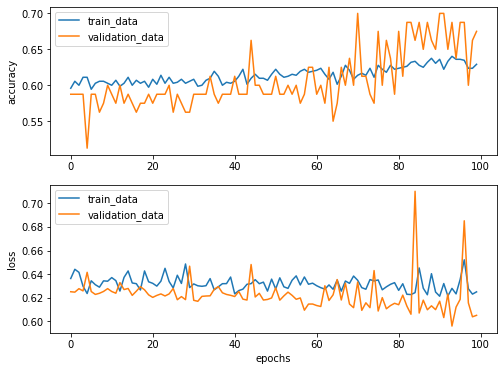

In [58]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

ax1.plot(his.history['accuracy'], label= 'train_data')
ax2.plot(his.history['loss'], label='train_data')

ax1.plot(his.history['val_accuracy'], label= 'validation_data')
ax2.plot(his.history['val_loss'], label='validation_data')

ax1.set_ylabel('accuracy')
ax2.set_ylabel('loss')
ax2.set_xlabel('epochs')
ax1.legend()
ax2.legend()